# CNN

* Créer des paires de document (article, highlights)
* Suppression de la ponctuation
* Séparation en token en minuscules
* Suppression des stopwords pour les articles
* Calcul des fréquences et tf-idf sur les deux types de documents
* Enregistrement du nouveau jeu de données d’entraînement pour usage ultérieur

Vous êtes allé jusqu'au bout ? Vérifiez-bien que vous avez les éléments suivants :

* le texte final est tokenisé sans ponctuation et en minuscules à l’aide d’une regex ;
* tous les documents ont été transformés en matrices de valeurs tf-idf calculées sur les paires (articles, highlight).

In [14]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter
from os import getcwd, listdir
from os.path import isfile, join
import bs4
import nltk
#nltk.download('punkt')

In [2]:
# ---------------------------------------------------------------------------------------------
#                               MAIN
# ---------------------------------------------------------------------------------------------
verbose = False
verboseMain = False

# Récupère le répertoire du programme
file_path = getcwd() + "\\"
data_path = file_path+"cnn2\\"
data_path

'c:\\Users\\User\\WORK\\wokspace-simplon3\\simplon\\2022-02-4470541-analysez-vos-donnees-textuelles\\cnn2\\'

In [3]:
fichiers = [f for f in listdir(data_path) if isfile(join(data_path, f)) and f.endswith(".story")]
fichiers

['0a000f521734500aa360bf6bb2bb31446e4d66cd.story',
 '0a001b54b5b0ea17f11aa8d7acafb40ae7748ca6.story',
 '0a0a4c90d59df9e36ffec4ba306b4f20f3ba4acb.story',
 '0a0aa464d262b903f44b0f8eaa67f13dd1946cfd.story',
 '0a0adc84ccbf9414613e145a3795dccc4828ddd4.story',
 '0a0b44620d0dec6fdfc1aa139ff51bcb36c56c51.story',
 '0a0b59738a88e97ef66322a8c866d22ebf079289.story',
 '0a0c2f4e07ba05f3226e8afec1350ac82161cd2e.story',
 '0a0d11c125e4e4b061061f44b08f60cb5b8bf177.story',
 '0a0f56ebc5a0a67ed18de79d99b40a42d8058d04.story',
 '0a1ad82d161d90d758240407cb8c8fcebff4a212.story']

In [8]:
def get_data_from_page(file_path):
  
    # Ouvrir le fichier en lecture seule
    file = open(file_path, "r")
    # utiliser readlines pour lire toutes les lignes du fichier
    # La variable "lignes" est une liste contenant toutes les lignes du fichier
    lines = file.readlines()
    # fermez le fichier après avoir lu les lignes
    file.close()

    highlights = []
    next_high = False
    sentences = ""

    # Itérer sur les lignes
    for line in lines:
        if "@highlight" in line:
            next_high = True
            continue
        str = line.strip()
        if len(str)>0:
            if next_high:
                highlights.append(line.strip())
            else:
                sentences += line.strip() + " "
        
    return (highlights, sentences)

In [27]:
df_origin = pd.DataFrame(columns=['file','highlights','sentences'])

In [28]:
for file in fichiers:
    try:
        highlights, sentences = get_data_from_page(data_path+file)
        new_row = {'file':file,'highlights':highlights, 'sentences':sentences}
        df_origin = df_origin.append(new_row,ignore_index=True, verify_integrity=False)
    except:
        pass
print(df_origin.shape)
df_origin.head()

(11, 3)


,file,highlights,sentences
0,0a000f521734500aa360bf6bb2bb31446e4d66cd.story,[Rory McIlroy shoots a course record at the Sc...,(CNN) -- Rory McIlroy is off to a good start a...
1,0a001b54b5b0ea17f11aa8d7acafb40ae7748ca6.story,[Africa Fashion Week London was held from Augu...,(CNN) -- Loud music pumps through huge speaker...
2,0a0a4c90d59df9e36ffec4ba306b4f20f3ba4acb.story,[Dean Obeidallah: A movie or TV show can educa...,(CNN) -- Can a movie actually convince you to ...
3,0a0aa464d262b903f44b0f8eaa67f13dd1946cfd.story,[Math geeks and others celebrate Pi Day every ...,March 14 is my favorite day to be a nerd. Acro...
4,0a0adc84ccbf9414613e145a3795dccc4828ddd4.story,[MH370 families hold sit-in outside the Malays...,Beijing (CNN) -- Families of Chinese passenger...


In [29]:
tokenizer = nltk.RegexpTokenizer(r'\w+')

In [30]:
df_token = df_origin.copy()

In [31]:
df_token["tokens"] = df_token['sentences'].apply(lambda x: tokenizer.tokenize(x.lower()))
df_token["tokens"]

0     [cnn, rory, mcilroy, is, off, to, a, good, sta...
1     [cnn, loud, music, pumps, through, huge, speak...
2     [cnn, can, a, movie, actually, convince, you, ...
3     [march, 14, is, my, favorite, day, to, be, a, ...
4     [beijing, cnn, families, of, chinese, passenge...
5     [united, nations, cnn, the, u, n, security, co...
6     [a, bipartisan, group, of, women, senators, wa...
7     [washington, cnn, the, white, house, wednesday...
8     [twitter, is, on, the, verge, of, its, initial...
9     [cnn, the, man, suspected, of, trying, to, att...
10    [beijing, china, cnn, soon, after, i, first, c...
Name: tokens, dtype: object

In [32]:
df_token["stats"] = df_token['tokens'].apply(lambda x: len(x))
df_token["stats"]

0      367
1      662
2      753
3     1236
4      634
5      234
6      223
7      915
8     1001
9      530
10    1030
Name: stats, dtype: int64

In [33]:
# Premièrement, on récupère la fréquence totale de chaque mot sur tout le corpus d'artistes
df_token["freq"] = df_token['tokens'].apply(lambda x: nltk.FreqDist(x))
df_token["freq"]

0     {'cnn': 1, 'rory': 1, 'mcilroy': 7, 'is': 3, '...
1     {'cnn': 1, 'loud': 1, 'music': 1, 'pumps': 1, ...
2     {'cnn': 1, 'can': 8, 'a': 15, 'movie': 6, 'act...
3     {'march': 4, '14': 11, 'is': 19, 'my': 1, 'fav...
4     {'beijing': 3, 'cnn': 4, 'families': 7, 'of': ...
5     {'united': 2, 'nations': 2, 'cnn': 1, 'the': 2...
6     {'a': 11, 'bipartisan': 1, 'group': 1, 'of': 5...
7     {'washington': 2, 'cnn': 7, 'the': 50, 'white'...
8     {'twitter': 8, 'is': 16, 'on': 6, 'the': 41, '...
9     {'cnn': 1, 'the': 64, 'man': 3, 'suspected': 1...
10    {'beijing': 5, 'china': 24, 'cnn': 1, 'soon': ...
Name: freq, dtype: object

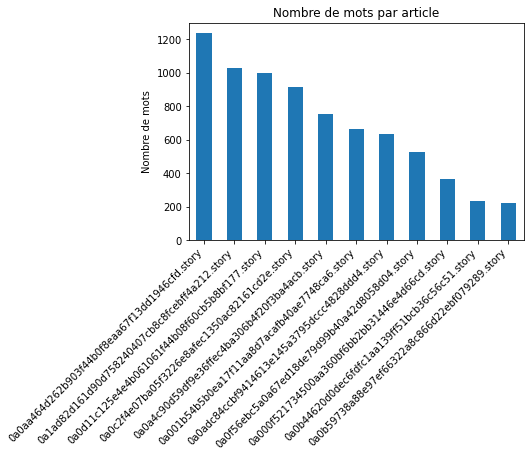

In [35]:
df_token = df_token.sort_values(by=["stats"], ascending=False)
df_token.plot(kind='bar', x='file', title='Nombre de mots par article',legend=None)
plt.ylabel("Nombre de mots")
plt.xlabel("")
plt.xticks(rotation=45, ha="right")
plt.show()

In [36]:
df_token["stats_unique_word"] = df_token["freq"].apply(lambda x: len(x.keys()))
df_token[["stats", "stats_unique_word"]]

,stats,stats_unique_word
3,1236,533
10,1030,523
8,1001,488
7,915,393
2,753,361
1,662,327
4,634,328
9,530,261
0,367,202
5,234,143


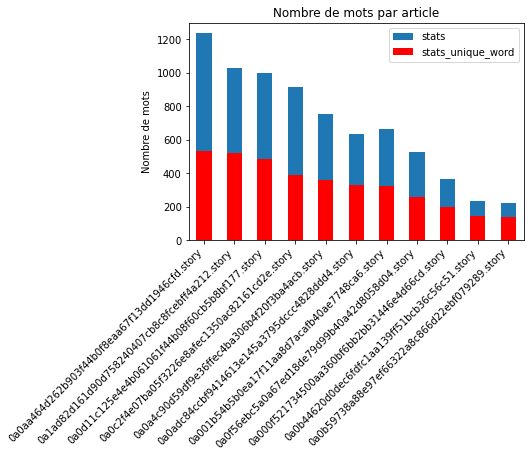

In [37]:
df_token = df_token.sort_values(by=["stats_unique_word", "stats"], ascending=False)
ax = df_token.plot(kind='bar', x='file', y="stats", title='Nombre de mots par article')
df_token.plot(y="stats_unique_word", x='file', kind="bar", ax=ax, color="red")
plt.ylabel("Nombre de mots")
plt.xlabel("")
plt.xticks(rotation=45, ha="right")
plt.show()

In [38]:
df_token.head()

,file,highlights,sentences,tokens,stats,freq,stats_unique_word
3,0a0aa464d262b903f44b0f8eaa67f13dd1946cfd.story,[Math geeks and others celebrate Pi Day every ...,March 14 is my favorite day to be a nerd. Acro...,"[march, 14, is, my, favorite, day, to, be, a, ...",1236,"{'march': 4, '14': 11, 'is': 19, 'my': 1, 'fav...",533
10,0a1ad82d161d90d758240407cb8c8fcebff4a212.story,[Mao proved to be good at fighting but poor at...,"BEIJING, China (CNN) -- Soon after I first cam...","[beijing, china, cnn, soon, after, i, first, c...",1030,"{'beijing': 5, 'china': 24, 'cnn': 1, 'soon': ...",523
8,0a0d11c125e4e4b061061f44b08f60cb5b8bf177.story,"[Soraya Chemaly: Twitter, on verge of IPO, is ...",Twitter is on the verge of its initial public ...,"[twitter, is, on, the, verge, of, its, initial...",1001,"{'twitter': 8, 'is': 16, 'on': 6, 'the': 41, '...",488
7,0a0c2f4e07ba05f3226e8afec1350ac82161cd2e.story,"[NEW: ""This is not the Scott we knew,"" White H...",WASHINGTON (CNN) -- The White House Wednesday ...,"[washington, cnn, the, white, house, wednesday...",915,"{'washington': 2, 'cnn': 7, 'the': 50, 'white'...",393
2,0a0a4c90d59df9e36ffec4ba306b4f20f3ba4acb.story,[Dean Obeidallah: A movie or TV show can educa...,(CNN) -- Can a movie actually convince you to ...,"[cnn, can, a, movie, actually, convince, you, ...",753,"{'cnn': 1, 'can': 8, 'a': 15, 'movie': 6, 'act...",361
